# PHY 3310 - Quantum Mechanics
# Multiparticle states and entanglement
-----------------------------------------------------------

Our focus this week is on multiparticle states and "spooky" entanglement. Here we will finally begin to utilize more than one qubit and set up quantum gates which act on two qubits.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from qiskit import *

In [ ]:
IBMQ.load_account() 

Let's introduce the Hadamard gate: $H\left|+\right\rangle = \left|+\right\rangle_{x}$, $H\left|-\right\rangle = \left|-\right\rangle_{x}$. 

Matrix representation:

$\displaystyle \hat{H} \dot{=} \frac{1}{\sqrt{2}}\left(\begin{array}{cc} 1 & 1 \\ 1 & -1\end{array}\right)$

Note, however, that this is just a $\hat{U}$ gate with $\theta = \frac{\pi}{2}$, $\phi = 0$, $\lambda = \pi$ where

$\displaystyle \hat{U}(\theta,\phi,\lambda) = \left(\begin{array}{cc} \cos\frac{\theta}{2} & -e^{i\lambda}\sin\frac{\theta}{2}\\ e^{i\phi}\sin\frac{\theta}{2} & e^{-i(\phi + \lambda)}\cos\frac{\theta}{2}\end{array}\right)$.

Because this particular gate (which takes the states $\left|\pm\right\rangle$ to $\left|\pm\right\rangle_{x}$, respectively) is so commonly used, it's often invoked as ```h(qr)``` directly instead of using ```u(0.5*np.pi,0,np.pi)```.

One can quickly verify that this gate does take $\left|+\right\rangle$ to $\left|+\right\rangle_{x}$ by applying it to newly initialized qubits and measuring $\hat{S}^{z}$.

In [16]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)

hcirc = QuantumCircuit(qr,cr)
hcirc.h(0)
hcirc.barrier(range(1))
hcirc.measure(qr, cr)
hcirc.draw()

┌───┐ ░ ┌─┐
q16_0: ┤ H ├─░─┤M├
       └───┘ ░ └╥┘
 c2: 1/═════════╩═
                0

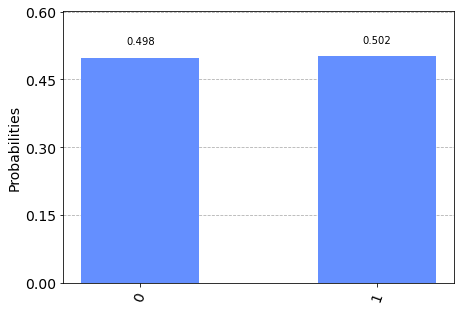

In [17]:
Nshot = 8192
job = execute(hcirc,
              backend=BasicAer.get_backend('qasm_simulator'),shots=Nshot)

counts = job.result().get_counts()

from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

As expected, we find half the states to be $\left|+\right\rangle$ and the other half to be $\left|-\right\rangle$, entirely consistent with the Hadamard gate creating $\left|+\right\rangle_{x}$ from the initialized $\left|+\right\rangle$ states.

Now let's talk <i>entanglement</i>, and try to create the following state:

$\left|\psi\right\rangle = \frac{1}{\sqrt{2}}\left(\left|+\right\rangle\left|-\right\rangle - \left|-
\right\rangle\left|+\right\rangle \right),$

also sometimes written $\frac{1}{\sqrt{2}}\left(\left|+-\right\rangle - \left|-+\right\rangle \right).$

Starting from $\left|++\right\rangle$, we can apply $\hat{H}$ to the first spin, obtaining $\frac{1}{\sqrt{2}}\left(\left|++\right\rangle + \left|-+\right\rangle\right)$. 

Next, the second spin needs to be flipped to $\left|-\right\rangle$ <i>only</i> in the first term. One way of phrasing this task is: "if the first spin state is $\left|+\right\rangle$, change the state of the second spin from $\left|+\right\rangle$ to $\left|-\right\rangle$. This is our first example of a multispin (or multiqubit) gate. It turns out that the $CNOT$ (controlled "not") gate accomplishes almost this:

$CNOT\left|++\right\rangle = \left|++\right\rangle$

$CNOT\left|+-\right\rangle = \left|+-\right\rangle$

$CNOT\left|-+\right\rangle = \left|--\right\rangle$

$CNOT\left|--\right\rangle = \left|-+\right\rangle$

Here we use the first spin as the "control" spin. If the first state is $\left|-\right\rangle$, then the second state is swapped. Otherwise, the two-spin state is unchanged. This gate by itself won't turn our state into the singlet. <i>But</i> if we flip the second spin first

$\frac{1}{\sqrt{2}}\left(\left|++\right\rangle + \left|-+\right\rangle\right) \rightarrow \frac{1}{\sqrt{2}}\left(\left|+-\right\rangle + \left|--\right\rangle\right),$

an application of $CNOT$ takes us almost to the singlet. The final step needs to change the sign of the $\left|-+\right\rangle$ term. This can be accomplished by the following unitary operation $\hat{U}(0, \pi, 0)$ acting on the first spin. This gate is equivalent to $\sigma^{z}$ and sometimes given the label $\hat{Z}$.Thus we need the following circuit:

In [18]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
singlet = QuantumCircuit(qr,cr)
singlet.h(0)
singlet.x(1)
singlet.cnot(0,1)
singlet.z(0)
singlet.barrier(range(2))
singlet.measure(qr, cr)
singlet.draw()

┌───┐     ┌───┐ ░ ┌─┐   
q20_0: ┤ H ├──■──┤ Z ├─░─┤M├───
       ├───┤┌─┴─┐└───┘ ░ └╥┘┌─┐
q20_1: ┤ X ├┤ X ├──────░──╫─┤M├
       └───┘└───┘      ░  ║ └╥┘
 c3: 2/═══════════════════╩══╩═
                          0  1

Measurement as employed above won't confirm the relative phase (and can't distinguish $\frac{1}{\sqrt{2}}\left(\left|+-\right\rangle - \left|-+\right\rangle\right)$ from $\frac{1}{\sqrt{2}}\left(\left|+-\right\rangle + \left|-+\right\rangle\right)$), but it does confirm that our state is an equal combination of $\left|+-\right\rangle$ and $\left|-+\right\rangle$.

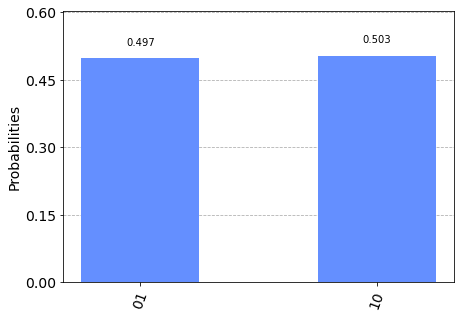

In [19]:
Nshot = 8192
job = execute(singlet,
              backend=BasicAer.get_backend('qasm_simulator'),shots=Nshot)

counts = job.result().get_counts()

from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

Recall that in interpreting these states, we need to remember the correspondence '0' $\rightarrow\left|+\right\rangle$, '1'$\rightarrow \left|-\right\rangle$. To address the phase, you can actually build this circuit in the IBM Circuit Composer and see the phase displayed. Alternatively, we can perform a series of measurements which distinguish these two states. 

The trick is to measure $\hat{S}^{2} \equiv \left[\hat{S}^{x}\right]^{2} + \left[\hat{S}^{y}\right]^{2} + \left[\hat{S}^{z}\right]^{2}$ for both states. For a multiparticle state, we have (e.g.)

$$\hat{S}^{x} = \hat{S}_{1}^{x} + \hat{S}^{x}_{2},$$

where $\hat{S}^{x}_{i}$ refers to the $x$ projection of spin for the $i^{th}$ spin. To calculate this expectation value analytically, one needs to remember that <i>all</i> operators acting on a two-spin state are actually tensor products of individual operators acting on both spins, though one might be trivial. Specifically, the spin component operators are

$$\hat{S}^{x}_{1} \equiv \hat{S}^{x}\otimes\hat{I},$$
$$\hat{S}^{x}_{1} \equiv \hat{I}\otimes\hat{S}^{x},$$

where $\hat{I}$ is the identity operator and $\hat{S}^{x}$ is the usual operator corresponding to the $x$ projection of a single spin, represented by a $2\times 2$ matrix. Fortunately, this distinction is not important for our experimental approach. 

Let's take a step back: in order to calculate $\hat{S}^{2}$, we'll need to measure <i>six</i> quantities: the three components of spin for each of the two spins. We also have to do this for both types of two-particle states, so that's really 12 separate circuits. As a matter of efficiency, it is technically possible to reset the state after a spin is measured. But this adds to the depth of the circuit and makes deciphering the results a little more complicated since we have to write everything to a single classical register. We can adopt one of several approaches: (1) make twelve two-qubit circuits and send out twelve jobs, (2) bundle (say) three uncoupled, two-qubit circuits together and send out four six-qubit circuits, or (3) get clever with <i>parameter</i> threading and try to bundle. Some benefits and drawbacks to each approach:

1. This is conceptually simplest, but it does involve writing twelve separate circuits and sending out a large number of individual jobs. Results are naturally organized, but there's more upfront work. Also, one might run into significant wait times if sending a large number of jobs out one at a time.
2. This is a nice middle-ground because it reduces the number of circuits by a factor of three. However, it involves using a larger classical register that must be deciphered. Instead of seeing (for example) '1' as a measurement, one will see something like '011' which must be split into '0', '1', and '1' for analysis.
3. The last approach has the benefit of bundling as much as possible as a single job <i>and</i> neatly organizing the individual measurements. The biggest drawback is the added complexity of figuring out an efficient way of threading the parameters <i>and</i> desigining a flexible-but-efficient circuit that can perform multiple tasks according to a set of parameters.

Here's a fairly reasonable middle ground: A spin measurement is fairly easy to be cast in terms of parameters. We have already seen how to perform a spin measurement in some arbitrary direction $\hat{n}(\theta,\phi)$. $\hat{S}^{x}$ corresponds to $\theta = \frac{\pi}{2}$, $\phi = 0$, $\hat{S}^{y}$ corresponds to $\theta = \frac{\pi}{2}$, $\phi = \frac{\pi}{2}$, and $\hat{S}^{z}$ corresponds to $\theta = 0$, $\phi = 0$ (or anything). Since the states are entangled, measuring one spin determines which value will be obtained from the measurement of the second spin (along that same direction). So we have to do these spin measurements independently (doubling the number of circuits, or at least the depth!). We'll make two copies of each state on a four-qubit circuit with the top two qubits for measuring the first spin and the bottom two for measuring the second spin. Each "subcircuit" is an identical set of gates with only the measurement differing. This <i>will</i> complicate the output, but it's not too bad with only two measurements. We need something like:

In [20]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

from qiskit.circuit import Parameter
theta = Parameter('θ')
phi = Parameter('ϕ')

In [21]:
singletcirc = QuantumCircuit(qr,cr)
#singlet state
singletcirc.h(0)
singletcirc.x(1)
singletcirc.cnot(0,1)
singletcirc.z(0)
singletcirc.barrier(qr)
singletcirc.rz(-phi,qr)
singletcirc.ry(-theta,qr)
singletcirc.measure(qr, cr)
singletcirc.draw()

┌───┐     ┌───┐ ░ ┌────────────┐┌────────────┐┌─┐   
q27_0: ┤ H ├──■──┤ Z ├─░─┤ RZ(-1.0*ϕ) ├┤ RY(-1.0*θ) ├┤M├───
       ├───┤┌─┴─┐└───┘ ░ ├────────────┤├────────────┤└╥┘┌─┐
q27_1: ┤ X ├┤ X ├──────░─┤ RZ(-1.0*ϕ) ├┤ RY(-1.0*θ) ├─╫─┤M├
       └───┘└───┘      ░ └────────────┘└────────────┘ ║ └╥┘
 c4: 2/═══════════════════════════════════════════════╩══╩═
                                                      0  1

Our results will be a package of three (one for each choice of $(\theta,\phi)$) dictionaries containing counts for the states '11', '00', '10', '01'. So a bit of post-processing is necesssary to make sense of this. Let's have a look at how this behaves on the QASM simulator. 

In [22]:
theta_range = [np.pi/2, np.pi/2, 0.0]
phi_range = [0.0, np.pi/2, 0.0]

Nshots = 8192
job = execute(singletcirc,shots=Nshots,
              backend=BasicAer.get_backend('qasm_simulator'),
              parameter_binds=[{theta: val1, phi: val2} for (val1, val2) in zip(theta_range, phi_range)])

counts_singlet = job.result().get_counts()

In [23]:
counts_singlet

[{'10': 4141, '01': 4051}, {'01': 4087, '10': 4105}, {'01': 4134, '10': 4058}]

The other state can be attacked similarly (and then we'll get to analyzing those counts)

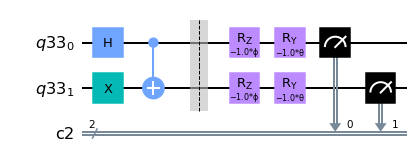

In [10]:
tripletcirc = QuantumCircuit(qr,cr)
#triplet state
tripletcirc.h(0)
tripletcirc.x(1)
tripletcirc.cnot(0,1)
tripletcirc.barrier(qr)
tripletcirc.rz(-phi,qr)
tripletcirc.ry(-theta,qr)
tripletcirc.measure(qr, cr)
tripletcirc.draw()

In [11]:
Nshots = 8192
job = execute(tripletcirc,shots=Nshots,
              backend=BasicAer.get_backend('qasm_simulator'),
              parameter_binds=[{theta: val1, phi: val2} for (val1, val2) in zip(theta_range, phi_range)])

counts_triplet = job.result().get_counts()

In [12]:
counts_triplet

[{'11': 4023, '00': 4169}, {'00': 4119, '11': 4073}, {'10': 4115, '01': 4077}]

<!--Clearly there <i>is</i> some difference. For the singlet, all spin components return perfectly (up to statistical fluctuations) anticorrelated results. One should never work harder than necessary, so let's try to find the easiest way to interpret these results.-->

We are attempting to measure the squared spin operator, 

$$\hat{S}^{2} = \left[\hat{S}_{1}^{x} + \hat{S}_{2}^{x}\right]^{2} + \left[\hat{S}_{1}^{y} + \hat{S}_{2}^{y}\right]^{2} + \left[\hat{S}_{1}^{z} + \hat{S}_{2}^{z}\right]^{2}$$

Here $\hat{S}_{1,2}^{x,y,z}$ are just spin-$\frac{1}{2}$ operators attached to an identity operator for the other spin. Thus, they satisfy the same algebra as the spin-$\frac{1}{2}$ operators. Simplifying, we have

$$\hat{S}^{2} = \hat{S}_{1}^{2} + \hat{S}_{2}^{2} + 2\hat{\bf S}_{1}\cdot \hat{\bf S}_{2}$$

Here, $\hat{S}_{1}^{2} \equiv \left[\hat{S}_{1}^{x}\right]^{2} + \left[\hat{S}_{1}^{y}\right]^{2} + \left[\hat{S}_{1}^{z}\right]^{2}$ and similarly for $\hat{S}_{2}^{2}$. The last term is shorthand for

$$\hat{\bf S}_{1}\cdot \hat{\bf S}_{2} = \hat{S}^{x}\otimes \hat{S}^{x} + \hat{S}^{y}\otimes \hat{S}^{y} + \hat{S}^{z}\otimes \hat{S}^{z}.$$

It's simple enough to use the $2\times 2$ Pauli representation of the single spin-$\frac{1}{2}$ operators to show

$$\hat{S}_{1}^{2} = \hat{S}_{2}^{2} = \frac{3\hbar^{2}}{4}\hat{I}.$$

Thus, for some state $\left|\psi\right\rangle$, we expect an average of a large number of measurements of $\hat{S}^{2}$ to yield

$$\left\langle \hat{S}^{2}\right\rangle = \frac{3\hbar^{2}}{2} + 2\left\langle \hat{\bf S}_{1} \cdot \hat{\bf S}_{2}\right\rangle.$$

That is, effectively we only need to measure $\left\langle \hat{\bf S}_{1} \cdot \hat{\bf S}_{2}\right\rangle$ to measure $\hat{S}^{2}$. Conveniently, the three sets of outputs correspond to the three terms in

$$\hat{\bf S}_{1}\cdot \hat{\bf S}_{2} = \hat{S}^{x}\otimes \hat{S}^{x} + \hat{S}^{y}\otimes \hat{S}^{y} + \hat{S}^{z}\otimes \hat{S}^{z}.$$

We just need to make the identifications (using $x$ as an example)

- '00': $\;\;\;\;\;\;\;\;\;\;\hat{S}_{1}^{x}\cdot\hat{S}_{2}^{x} \rightarrow \left(+\frac{\hbar}{2}\right)\left(+\frac{\hbar}{2}\right) = + \left(\frac{\hbar}{2}\right)^{2}$
- '01': $\;\;\;\;\;\;\;\;\;\;\hat{S}_{1}^{x}\cdot\hat{S}_{2}^{x} \rightarrow \left(+\frac{\hbar}{2}\right)\left(-\frac{\hbar}{2}\right) = - \left(\frac{\hbar}{2}\right)^{2}$
- '10': $\;\;\;\;\;\;\;\;\;\;\hat{S}_{1}^{x}\cdot\hat{S}_{2}^{x} \rightarrow \left(-\frac{\hbar}{2}\right)\left(+\frac{\hbar}{2}\right) = - \left(\frac{\hbar}{2}\right)^{2}$
- '11': $\;\;\;\;\;\;\;\;\;\;\hat{S}_{1}^{x}\cdot\hat{S}_{2}^{x} \rightarrow \left(-\frac{\hbar}{2}\right)\left(-\frac{\hbar}{2}\right) = + \left(\frac{\hbar}{2}\right)^{2}$

So let's grab the counts and compute the spin correlations according to this dictionary:

In [14]:
n00 = list(map(lambda c: c.get('00', 0), counts_triplet))
n01 = list(map(lambda c: c.get('01', 0), counts_triplet))
n10 = list(map(lambda c: c.get('10', 0), counts_triplet))
n11 = list(map(lambda c: c.get('11', 0), counts_triplet))

Next we effectively perform an average of the measurement outcomes ($\pm\frac{\hbar^{2}}{4}$ depending on the relative aligmnent of the two spins, weighted by the number of counts for each possibility:

In [15]:
Sx12 = 0.25*(n00[0]+n11[0]-n01[0]-n10[0])/(n00[0]+n11[0]+n01[0]+n10[0])
Sy12 = 0.25*(n00[1]+n11[1]-n01[1]-n10[1])/(n00[1]+n11[1]+n01[1]+n10[1])
Sz12 = 0.25*(n00[2]+n11[2]-n01[2]-n10[2])/(n00[2]+n11[2]+n01[2]+n10[2])

Lastly, we compute (for the triplet state):

$$\left\langle \hat{S}^{2}\right\rangle  = \frac{3\hbar^{2}}{2} + \left\langle\hat{\bf S}_{1}\cdot {\bf S}_{2}\right\rangle$$

In [16]:
print(0.75+0.75+2*(Sz12+Sx12+Sy12))

2.0

Repeating for the singlet state:

In [ ]:
n00 = list(map(lambda c: c.get('00', 0), counts_singlet))
n01 = list(map(lambda c: c.get('01', 0), counts_singlet))
n10 = list(map(lambda c: c.get('10', 0), counts_singlet))
n11 = list(map(lambda c: c.get('11', 0), counts_singlet))


Sx12 = 0.25*(n00[0]+n11[0]-n01[0]-n10[0])/(n00[0]+n11[0]+n01[0]+n10[0])
Sy12 = 0.25*(n00[1]+n11[1]-n01[1]-n10[1])/(n00[1]+n11[1]+n01[1]+n10[1])
Sz12 = 0.25*(n00[2]+n11[2]-n01[2]-n10[2])/(n00[2]+n11[2]+n01[2]+n10[2])

print(0.75+0.75+2*(Sz12+Sx12+Sy12))

Inserting the "missing" factors of $\hbar$, we conclude

$$\left\langle \hat{S}^{2}\right\rangle = \left\{\begin{array}{cc} 1\cdot(1+1)\hbar^{2} & (\mbox{triplet})\\ 0 & (\mbox{singlet})\end{array}\right.$$

Single qubits map to spin-$\frac{1}{2}$ degrees of freedom. When we consider the state describing multiple qubits, we find that such a state can map to a general spin-$s$ state for which$^{\dagger}$ $\hat{S}^{2} \rightarrow s(s+1)\hbar^{2}\hat{I}$ with $s = 0,\frac{1}{2},1,\frac{3}{2},\cdots$. Comparing this to our observations, we find that the triplet state is actually a spin-$1$ state, while the singlet is spin-0 (no internal spin degree of freedom). 

$\dagger$ - The squared-spin operator only takes on this simple form in the basis of total spin $s$ eigenstates.

Now let us try running this on real hardware. Remember that it's a good idea to print out your job IDs so you can easily grab the appropriate data if you ever need to reanalyze it.

In [19]:
qcomp = provider.get_backend('ibmq_manila')

In [20]:
Nshots = 8192
qcomp = provider.get_backend('ibmq_manila')
job = execute(singletcirc,
        backend=qcomp,shots=8192,
        parameter_binds=[{theta: val1, phi: val2} for (val1, val2) in zip(theta_range, phi_range)])

from qiskit.tools.monitor import job_monitor
job_monitor(job)

counts_sing = job.result().get_counts()
print(job.job_id())

Job Status: job has successfully run
61351da09b2ca931ac4946b1


In [21]:
Nshots = 8192
qcomp = provider.get_backend('ibmq_manila')
job = execute(tripletcirc,
        backend=qcomp,shots=8192,
        parameter_binds=[{theta: val1, phi: val2} for (val1, val2) in zip(theta_range, phi_range)])

job_monitor(job)
counts_trip = job.result().get_counts()
print(job.job_id())

Job Status: job has successfully run
61351db856b0387b1cf4c2ab


In [33]:
n00 = list(map(lambda c: c.get('00', 0), counts_sing))
n01 = list(map(lambda c: c.get('01', 0), counts_sing))
n10 = list(map(lambda c: c.get('10', 0), counts_sing))
n11 = list(map(lambda c: c.get('11', 0), counts_sing))


Sx12s = 0.25*(n00[0]+n11[0]-n01[0]-n10[0])/(n00[0]+n11[0]+n01[0]+n10[0])
Sy12s = 0.25*(n00[1]+n11[1]-n01[1]-n10[1])/(n00[1]+n11[1]+n01[1]+n10[1])
Sz12s = 0.25*(n00[2]+n11[2]-n01[2]-n10[2])/(n00[2]+n11[2]+n01[2]+n10[2])

Ssq = 0.75+0.75+2*(Sz12s+Sx12s+Sy12s)
print('<S^2> = ' + str(Ssq) + ' (singlet)')

<S^2> = 0.18408203125


In [34]:
n00 = list(map(lambda c: c.get('00', 0), counts_trip))
n01 = list(map(lambda c: c.get('01', 0), counts_trip))
n10 = list(map(lambda c: c.get('10', 0), counts_trip))
n11 = list(map(lambda c: c.get('11', 0), counts_trip))


Sx12t = 0.25*(n00[0]+n11[0]-n01[0]-n10[0])/(n00[0]+n11[0]+n01[0]+n10[0])
Sy12t = 0.25*(n00[1]+n11[1]-n01[1]-n10[1])/(n00[1]+n11[1]+n01[1]+n10[1])
Sz12t = 0.25*(n00[2]+n11[2]-n01[2]-n10[2])/(n00[2]+n11[2]+n01[2]+n10[2])

Ssq = 0.75+0.75+2*(Sz12t+Sx12t+Sy12t)
print('<S^2> = ' + str(Ssq) + ' (triplet)')

<S^2> = 1.8765869140625


The results are a bit noisier, but roughly agree with the simulation prediction. 

This quantity $\left\langle \hat{\bf S}_{1}\cdot\hat{\bf S}_{2}\right\rangle$ is actually an example of something refered to as a <i>correlation function</i>. If we take a closer look at the invidual pieces, we can gain some insight into the quantum state:

In [36]:
print('<Sx1 Sx2> = '+str(Sx12s))
print('<Sy1 Sy2> = '+str(Sy12s))
print('<Sz1 Sz2> = '+str(Sz12s))

<Sx1 Sx2> = -0.219482421875
<Sy1 Sy2> = -0.21673583984375
<Sz1 Sz2> = -0.22174072265625


In [37]:
print('<Sx1 Sx2> = '+str(Sx12t))
print('<Sy1 Sy2> = '+str(Sy12t))
print('<Sz1 Sz2> = '+str(Sz12t))

<Sx1 Sx2> = 0.2117919921875
<Sy1 Sy2> = 0.18548583984375
<Sz1 Sz2> = -0.208984375


Both states show anticorrelation in the individual measurements of $\hat{S}^{z}$. This makes sense, because both states are composed of $\left|+-\right\rangle$ and $\left|-+\right\rangle$, so there's no possible way to have both spins in the same eigenstate of $\hat{S}^{z}$. That relative phase ($e^{i0} = 1$ vs. $e^{i\pi} = -1$ makes a significant difference in the correlations between the spins with respect to $\hat{S}^{x}$ and $\hat{S}^{y}$. 

For the "triplet" state, the positive correlations $\left\langle \hat{S}^{x}_{1}\hat{S}_{2}^{x}\right\rangle$ and $\left\langle \hat{S}^{y}_{1}\hat{S}_{2}^{y}\right\rangle$ indicate that the $x$ and $y$ projections of the individual spins have a tendency to align. Classically, one thinks of spin as a little arrow of magnitude $\frac{\hbar}{2}$ which points along some axis in three-dimensional space. Combining two spins results in a new type of quantum state whose interpretation is not so simple. It is possible to identify this state as an effective spin-1 state with $\left\langle \hat{S}^{z} \right\rangle = 0$. In the classical picture, this corresponds to a little vector of magnitude $\hbar$ which has no projection along $z$ and lives in the $xy$ plane. Of course, this state <i>isn't</i> a classical vector in real space. But this sloppy picture is roughly reflected in the structure of the correlations. 

The singlet state is a bit more interesting. All correlations are negative. The individual spins appear <i>entirely</i> anticorrelated, regardless of the direction. Consequently, it should not be too surprising to learn that this two-particle state can be viewed effectively as a spinless ($s = 0$) state. To really drive home these correlations, let's look more closely at how they change for both states as the spin axis is varied. For simplicity, let's just keep $\phi = 0$ and vary $\theta$ from 0 to $\pi$. To proceed, we thread a sample of $\theta$ values into the circuit to bundle everything together.

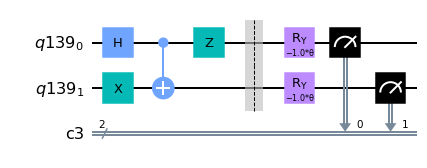

In [40]:
singletcircθ = QuantumCircuit(qr,cr)
#singlet state
singletcircθ.h(0)
singletcircθ.x(1)
singletcircθ.cnot(0,1)
singletcircθ.z(0)
singletcircθ.barrier(qr)
singletcircθ.ry(-theta,qr)
singletcircθ.measure(qr, cr)
singletcircθ.draw()

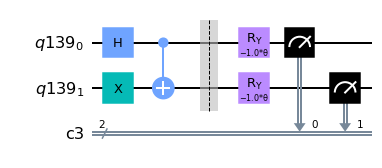

In [41]:
tripletcircθ = QuantumCircuit(qr,cr)
#triplet state
tripletcircθ.h(0)
tripletcircθ.x(1)
tripletcircθ.cnot(0,1)
tripletcircθ.barrier(qr)
tripletcircθ.ry(-theta,qr)
tripletcircθ.measure(qr, cr)
tripletcircθ.draw()

It's always a good idea to check the computer you plan to use before setting a range of parameter values. Different machines accept a different number of circuits per job. If you get a strange-looking error, make sure the following number of $\theta$ samples isn't too large.

In [52]:
Ntheta = 75
theta_range = np.linspace(0,np.pi,Ntheta)

We'll run both of these on the simulator and on a quantum device.

In [53]:
Nshots = 8192
job = execute(tripletcircθ,shots=Nshots,
              backend=BasicAer.get_backend('qasm_simulator'),
              parameter_binds=[{theta: val1} for val1 in theta_range])

counts_tripθsim = job.result().get_counts()

In [54]:
Nshots = 8192
job = execute(singletcircθ,shots=Nshots,
              backend=BasicAer.get_backend('qasm_simulator'),
              parameter_binds=[{theta: val1} for val1 in theta_range])

counts_singθsim = job.result().get_counts()

In [56]:
Nshots = 8192
qcomp = provider.get_backend('ibmq_manila')
job = execute(singletcircθ,
        backend=qcomp,shots=8192,
        parameter_binds=[{theta: val1} for val1 in theta_range])

job_monitor(job)

counts_singθ = job.result().get_counts()
print(job.job_id())

Job Status: job has successfully run
61352b291b9435162a1005ed


In [57]:
Nshots = 8192
qcomp = provider.get_backend('ibmq_manila')
job = execute(tripletcircθ,
        backend=qcomp,shots=8192,
        parameter_binds=[{theta: val1} for val1 in theta_range])

job_monitor(job)

counts_tripθ = job.result().get_counts()
print(job.job_id())

Job Status: job has successfully run
61352bed61ab236b0cbeb9ed


The analysis is roughly the same, but with <i>many</i> values of $\theta$, we're better off letting a loop organize everything:

In [58]:
S1S2tripsim = np.zeros(Ntheta)
S1S2singsim = np.zeros(Ntheta)
S1S2trip = np.zeros(Ntheta)
S1S2sing = np.zeros(Ntheta)

n00 = list(map(lambda c: c.get('00', 0), counts_tripθsim))
n01 = list(map(lambda c: c.get('01', 0), counts_tripθsim))
n10 = list(map(lambda c: c.get('10', 0), counts_tripθsim))
n11 = list(map(lambda c: c.get('11', 0), counts_tripθsim))

for i in range(0,Ntheta):
    S1S2tripsim[i] = 0.25*(n00[i]+n11[i]-n01[i]-n10[i])/(n00[i]+n11[i]+n01[i]+n10[i])
    
n00 = list(map(lambda c: c.get('00', 0), counts_singθsim))
n01 = list(map(lambda c: c.get('01', 0), counts_singθsim))
n10 = list(map(lambda c: c.get('10', 0), counts_singθsim))
n11 = list(map(lambda c: c.get('11', 0), counts_singθsim))

for i in range(0,Ntheta):
    S1S2singsim[i] = 0.25*(n00[i]+n11[i]-n01[i]-n10[i])/(n00[i]+n11[i]+n01[i]+n10[i])
    
n00 = list(map(lambda c: c.get('00', 0), counts_tripθ))
n01 = list(map(lambda c: c.get('01', 0), counts_tripθ))
n10 = list(map(lambda c: c.get('10', 0), counts_tripθ))
n11 = list(map(lambda c: c.get('11', 0), counts_tripθ))

for i in range(0,Ntheta):
    S1S2trip[i] = 0.25*(n00[i]+n11[i]-n01[i]-n10[i])/(n00[i]+n11[i]+n01[i]+n10[i])
    
n00 = list(map(lambda c: c.get('00', 0), counts_singθ))
n01 = list(map(lambda c: c.get('01', 0), counts_singθ))
n10 = list(map(lambda c: c.get('10', 0), counts_singθ))
n11 = list(map(lambda c: c.get('11', 0), counts_singθ))

for i in range(0,Ntheta):
    S1S2sing[i] = 0.25*(n00[i]+n11[i]-n01[i]-n10[i])/(n00[i]+n11[i]+n01[i]+n10[i])


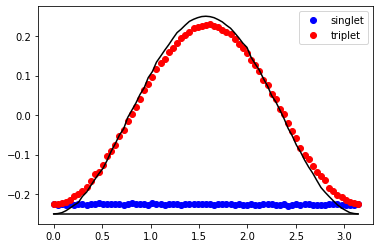

In [62]:
from matplotlib import pyplot as plt

plt.plot(theta_range,S1S2sing,'bo',label='singlet')
plt.plot(theta_range,S1S2trip,'ro',label='triplet')
plt.plot(theta_range,S1S2singsim,'k-')
plt.plot(theta_range,S1S2tripsim,'k-')
plt.xlabel('θ')
plt.ylabel('<S1S2>')
plt.legend()
plt.show()

Agreement between simulation and actual results is fairly decent, but note that the actual correlations are never quite as large (either positive or negative) as the simulated correlations. This is a general feature of noisy systems, and these effects become more pronounced as (a) circuit depth is increased or (b) more two-qubit gates are used. The error rates for two qubit gates are roughly an order of magnitude larger than those of single qubit gates.

<b>Exercise 1: </b> Create the singlet and triplet states as before, but perform a rotation to change them into

$$\left|\psi'\right\rangle_{sing} \rightarrow \frac{1}{\sqrt{2}}\left(\left|+\right\rangle_{x}\left|-\right\rangle_{x} - \left|-\right\rangle_{x}\left|+\right\rangle_{x}\right),$$ 

$$\left|\psi'\right\rangle_{trip} \rightarrow \frac{1}{\sqrt{2}}\left(\left|+\right\rangle_{x}\left|-\right\rangle_{x} + \left|-\right\rangle_{x}\left|+\right\rangle_{x}\right),$$ 

If you repeat the calculation of the three correlation functions, $\left\langle \hat{S}^{\alpha}\otimes\hat{S}^{\alpha}\right\rangle$ for $\alpha = x,y,z$, which change and which stay the same? Discuss any possible reasons for the results you find.

<b>Solution: </b>

The basic idea is to copy the singlet/triplet circuits from above and simply perform a rotation on qubit of 90 degrees about the $y$ axis.

a) Singlet state

In [25]:
singletcirc = QuantumCircuit(qr,cr)
#singlet state
singletcirc.h(0)
singletcirc.x(1)
singletcirc.cnot(0,1)
singletcirc.z(0)
singletcirc.barrier(qr)
singletcirc.ry(np.pi/2,qr)
singletcirc.barrier(qr)
singletcirc.rz(-phi,qr)
singletcirc.ry(-theta,qr)
singletcirc.measure(qr, cr)
singletcirc.draw()

theta_range = [np.pi/2, np.pi/2, 0.0]
phi_range = [0.0, np.pi/2, 0.0]

Nshots = 8192
job = execute(singletcirc,shots=Nshots,
              backend=BasicAer.get_backend('qasm_simulator'),
              parameter_binds=[{theta: val1, phi: val2} for (val1, val2) in zip(theta_range, phi_range)])

counts_singlet = job.result().get_counts()

n00 = list(map(lambda c: c.get('00', 0), counts_singlet))
n01 = list(map(lambda c: c.get('01', 0), counts_singlet))
n10 = list(map(lambda c: c.get('10', 0), counts_singlet))
n11 = list(map(lambda c: c.get('11', 0), counts_singlet))


Sx12s = 0.25*(n00[0]+n11[0]-n01[0]-n10[0])/(n00[0]+n11[0]+n01[0]+n10[0])
Sy12s = 0.25*(n00[1]+n11[1]-n01[1]-n10[1])/(n00[1]+n11[1]+n01[1]+n10[1])
Sz12s = 0.25*(n00[2]+n11[2]-n01[2]-n10[2])/(n00[2]+n11[2]+n01[2]+n10[2])

print('<SxSx> = ' + str(Sx12s))
print('<SySy> = ' + str(Sy12s))
print('<SzSz> = ' + str(Sz12s))

<SxSx> = -0.25
<SySy> = -0.25
<SzSz> = -0.25


So the results are the same for this "singlet" with respect to the $\left|\pm\right\rangle_{x}$. On to the triplet...

b) Triplet state

In [27]:
tripletcirc = QuantumCircuit(qr,cr)
#triplet state
tripletcirc.h(0)
tripletcirc.x(1)
tripletcirc.cnot(0,1)
tripletcirc.barrier(qr)
tripletcirc.ry(np.pi/2,qr)
tripletcirc.barrier(qr)
tripletcirc.rz(-phi,qr)
tripletcirc.ry(-theta,qr)
tripletcirc.measure(qr, cr)
tripletcirc.draw()

theta_range = [np.pi/2, np.pi/2, 0.0]
phi_range = [0.0, np.pi/2, 0.0]

Nshots = 8192
job = execute(tripletcirc,shots=Nshots,
              backend=BasicAer.get_backend('qasm_simulator'),
              parameter_binds=[{theta: val1, phi: val2} for (val1, val2) in zip(theta_range, phi_range)])

counts_triplet = job.result().get_counts()

n00 = list(map(lambda c: c.get('00', 0), counts_triplet))
n01 = list(map(lambda c: c.get('01', 0), counts_triplet))
n10 = list(map(lambda c: c.get('10', 0), counts_triplet))
n11 = list(map(lambda c: c.get('11', 0), counts_triplet))


Sx12t = 0.25*(n00[0]+n11[0]-n01[0]-n10[0])/(n00[0]+n11[0]+n01[0]+n10[0])
Sy12t = 0.25*(n00[1]+n11[1]-n01[1]-n10[1])/(n00[1]+n11[1]+n01[1]+n10[1])
Sz12t = 0.25*(n00[2]+n11[2]-n01[2]-n10[2])/(n00[2]+n11[2]+n01[2]+n10[2])

print('<SxSx> = ' + str(Sx12t))
print('<SySy> = ' + str(Sy12t))
print('<SzSz> = ' + str(Sz12t))

<SxSx> = -0.25
<SySy> = 0.25
<SzSz> = 0.25


This is the same as for the normal triplet, but the negative correlation is along the $x$ direction instead of the $z$ direction as it was previously.

<b>Exercise 2: </b> Consider a state which interpolates between the singlet and triplet state,

$$\left|\psi(\phi)\right\rangle = \frac{1}{\sqrt{2}}\left(\left|+\right\rangle\left|-\right\rangle +e^{i\phi}\left|-\right\rangle\left|+\right\rangle\right),$$

for $0 \leq \phi\leq \pi$. Calculate and plot the three correlation functions, $\left\langle \hat{S}^{\alpha}\otimes\hat{S}^{\alpha}\right\rangle$ for $\alpha = x,y,z$ as functions of the angle $\phi$.

<b>Solution: </b>

The trick with this state is to apply a unitary gate $U(\frac{1}{\sqrt{2}},\phi,0)$ instead of the basic Hadamard gate. We can use $\phi$ as a parameter, and we don't need to final $Z$ gate to flip the sign to create a singlet state. It's easiest to calculate the correlation functions using separate circuits since $\phi$ is already being used to parameterize the state.

In [28]:
phi = Parameter('ϕ')
Nt = 75

qr = QuantumRegister(2)
cr = ClassicalRegister(2)

circx = QuantumCircuit(qr,cr) 
circx.u(np.pi/2,phi,0,0)
circx.x(1)
circx.cnot(0,1)
circx.barrier(qr)
circx.ry(-np.pi/2,qr) #rotation to measure <SxSx>
circx.measure(qr,cr)
circx.draw()

┌─────────────┐      ░ ┌───────────┐┌─┐   
q59_0: ┤ U(pi/2,ϕ,0) ├──■───░─┤ RY(-pi/2) ├┤M├───
       └────┬───┬────┘┌─┴─┐ ░ ├───────────┤└╥┘┌─┐
q59_1: ─────┤ X ├─────┤ X ├─░─┤ RY(-pi/2) ├─╫─┤M├
            └───┘     └───┘ ░ └───────────┘ ║ └╥┘
 c5: 2/═════════════════════════════════════╩══╩═
                                            0  1

In [31]:
phi_range = np.linspace(0,np.pi, Nt)
Nshots = 8192

job = execute(circx,
              backend=BasicAer.get_backend('qasm_simulator'),shots=Nshots,
              parameter_binds=[{phi: p_val} for p_val in phi_range])

counts = job.result().get_counts()

c00 = np.array(list(map(lambda c: c.get('00', 0), counts)))
c01 = np.array(list(map(lambda c: c.get('01', 0), counts)))
c10 = np.array(list(map(lambda c: c.get('10', 0), counts)))
c11 = np.array(list(map(lambda c: c.get('11', 0), counts)))

Sx12 = 0.25*(c00+c11-c01-c10)/(c00+c11+c01+c10)

In [34]:
phi = Parameter('ϕ')
Nt = 75

qr = QuantumRegister(2)
cr = ClassicalRegister(2)

circy = QuantumCircuit(qr,cr) 
circy.u(np.pi/2,phi,0,0)
circy.x(1)
circy.cnot(0,1)
circy.barrier(qr)
circy.rz(-np.pi/2,qr) 
circy.ry(-np.pi/2,qr) #rotation to measure <SySy>
circy.measure(qr,cr)
circy.draw()

job = execute(circy,
              backend=BasicAer.get_backend('qasm_simulator'),shots=Nshots,
              parameter_binds=[{phi: p_val} for p_val in phi_range])

counts = job.result().get_counts()

c00 = np.array(list(map(lambda c: c.get('00', 0), counts)))
c01 = np.array(list(map(lambda c: c.get('01', 0), counts)))
c10 = np.array(list(map(lambda c: c.get('10', 0), counts)))
c11 = np.array(list(map(lambda c: c.get('11', 0), counts)))

Sy12 = 0.25*(c00+c11-c01-c10)/(c00+c11+c01+c10)

In [35]:
phi = Parameter('ϕ')
Nt = 75

qr = QuantumRegister(2)
cr = ClassicalRegister(2)

circy = QuantumCircuit(qr,cr) 
circy.u(np.pi/2,phi,0,0)
circy.x(1)
circy.cnot(0,1)
circy.barrier(qr)
circy.measure(qr,cr)
circy.draw()

job = execute(circy,
              backend=BasicAer.get_backend('qasm_simulator'),shots=Nshots,
              parameter_binds=[{phi: p_val} for p_val in phi_range])

counts = job.result().get_counts()

c00 = np.array(list(map(lambda c: c.get('00', 0), counts)))
c01 = np.array(list(map(lambda c: c.get('01', 0), counts)))
c10 = np.array(list(map(lambda c: c.get('10', 0), counts)))
c11 = np.array(list(map(lambda c: c.get('11', 0), counts)))

Sz12 = 0.25*(c00+c11-c01-c10)/(c00+c11+c01+c10)

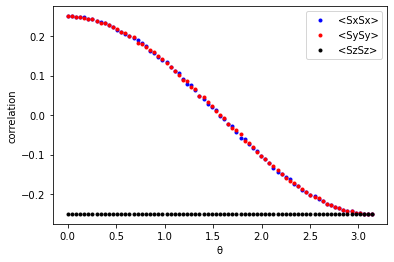

In [37]:
plt.plot(phi_range,Sx12,'b.',label='<SxSx>')
plt.plot(phi_range,Sy12,'r.',label='<SySy>')
plt.plot(phi_range,Sz12,'k.',label='<SzSz>')
plt.legend()
plt.xlabel('θ')
plt.ylabel('correlation')
plt.show()

One can go through a calculation with the spin operators to show

$$\left\langle \hat{S}^{x}\otimes\hat{S}^{x}\right\rangle = \left\langle \hat{S}^{y}\otimes\hat{S}^{y}\right\rangle  =  \frac{\hbar^{2}}{4}\cos\phi,$$

while $\left\langle \hat{S}^{z}\otimes\hat{S}^{z}\right\rangle  = -\frac{\hbar^{2}}{4}$, in agreement with the simulation.